# 2. Exploratory Data Analysis

#Table of Contents
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
	* [2.0 General characteristics of MITx: 8.MechCx](#2.0-General-characteristics-of-MITx:-8.MechCx)
	* [2.1 Load Masterfile](#2.1-Load-Masterfile)
	* [2.2 Activity Specific Trends](#2.2-Activity-Specific-Trends)
		* [2.2.1 Forum](#2.2.1-Forum)
		* [2.2.2 Video](#2.2.2-Video)
		* [2.2.3 Problems](#2.2.3-Problems)
	* [2.3 Total User Activity in the Course](#2.3-Total-User-Activity-in-the-Course)
    * [2.4 Weekly Activity per User](#2.4-Weekly-Activity-per-User)
    * [2.5 Daily Aggregate Activities](#2.5-Daily-Aggregate-Activities)
    * [2.6 Pair Plots](#2.6-Pair-Plots)
    * [2.7 Inactive Users](#2.7-Inactive-Users)

## 2.0 General characteristics of MITx: 8.MechCx

<img src="./images/mooc-2eda.png" width=600 height=600/>

In the above inforgraphic we are showing a general characteristics of the student population that were enrolled for MITx: 8.MechCx Advanced Introductory Classical Mechanics. 

Demographics wise, out of 13,207 students enrolled, 12.5% were located in the US, 6.8% in India, 1.3% in China, 1.1% in Brazil and Egypt. The other countries you see in the inforgraphic had less than 1% of students.

As for the educational background, 37% of students were holders of Masters of phD degrees, 28% Bachelors, and 24% High School students.

Also, out of 13,207 enrolled, 91% dropped out according to our definition of a dropout.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import datetime
import dateutil

## 2.1 Load Masterfile

In [2]:
# Read in masterfile from 'data_management.ipynb'
df_usertask=pd.read_csv("./data/usertasks.txt", sep='\t',parse_dates=['date'], date_parser=dateutil.parser.parse)
# drop the first column
df_usertask=df_usertask.drop(df_usertask.columns[0], axis=1)
# df_usertask.head()

## 2.2 Activity Specific Trends

We start off by looking into 3 major areas of the course activity: forums, problems and videos.

### 2.2.1 Forum

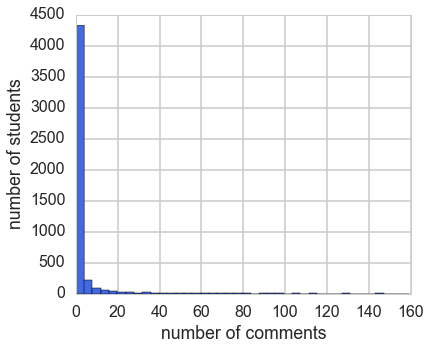

In [3]:
df_activity = df_usertask.groupby(['user_id']).count()
df_activity = df_activity.reset_index()
plt.figure(figsize=(6,5))
plt.hist(df_activity.nforum_activity, bins = 40, color='royalblue')
plt.ylabel('number of students')
plt.xlabel('number of comments')

### 2.2.2 Video

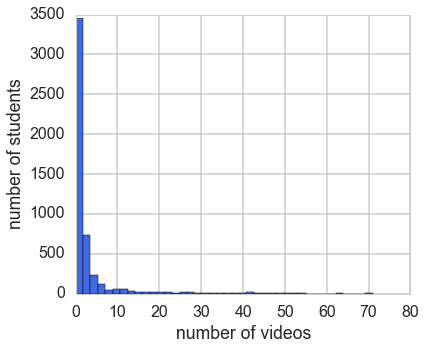

In [4]:
plt.figure(figsize=(6,5))
plt.hist(df_activity.nvideo, bins = 40, color='royalblue')
plt.ylabel('number of students')
plt.xlabel('number of videos')

### 2.2.3 Problems

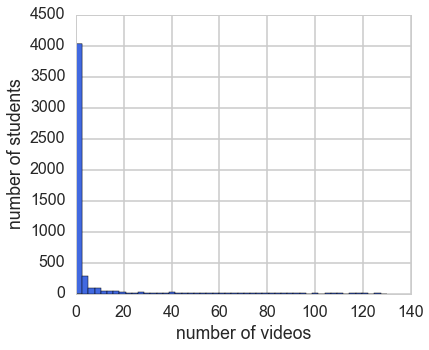

In [5]:
plt.figure(figsize=(6,5))
plt.hist(df_activity.nproblems, bins = 50, color='royalblue')
plt.ylabel('number of students')
plt.xlabel('number of videos')

The distributions of these three areas of activities are skewed to the right - there are only a few students watching all videos, doing all problem sets and contributing to forum discussion. Most of the students are active once in a while. Forums seem to be the less used activity among the three, most students seem to watch videos or answer/solve problems. 

## 2.3 Total User Activity in the Course

Now we would like to see total contribution of each user throughout the whole course. We are interested in seeing contribution from various dimensions of each major course activity. The dimensions we considered are the total time spent on a certain activity and the total number of activities. In the case of problem activities, we went more granular and added number of attempts for a problem, and number of problems gotten correct.

In [38]:
df_kde = df_usertask.groupby(['username', 'user_id', 'dropout']).sum()
df_kde['pass_rate'] = 100.0 * df_kde.nproblems_correct / df_kde.nproblem_attempts
df_kde = df_kde.reset_index()
# df_kde.head()

In [39]:
# GLOBAL COLUMNS TO USE
COL_LIST=['total_time_30','total_video_time_30','total_problem_time_30','total_forum_time_30','total_text_time_30','nvideo','nforum_activity','nproblem_attempts','nproblems_correct','nproblems', 'pass_rate']
TITLES = ['Total Time', 'Total Video Time (sec)', 'Total Problem Time (sec)', 'Total Forum Time (sec)', 'Total Text Time (sec)', 'Number of Videos Seen', 'Number of Forum Activities', 'Number of Problem Attempts', 'Number of Problems Passed', 'Unique Problems Attempted', 'Success Rate (percent)']
YLABEL = ['Time (sec)', 'Time (sec)', 'Time (sec)', 'Time (sec)', 'Time (sec)', 'Frequency', 'Frequency','Frequency','Frequency', 'Frequency', 'Frequency']
map_title = dict(zip(COL_LIST, TITLES))
map_ylabel = dict(zip(COL_LIST, YLABEL))

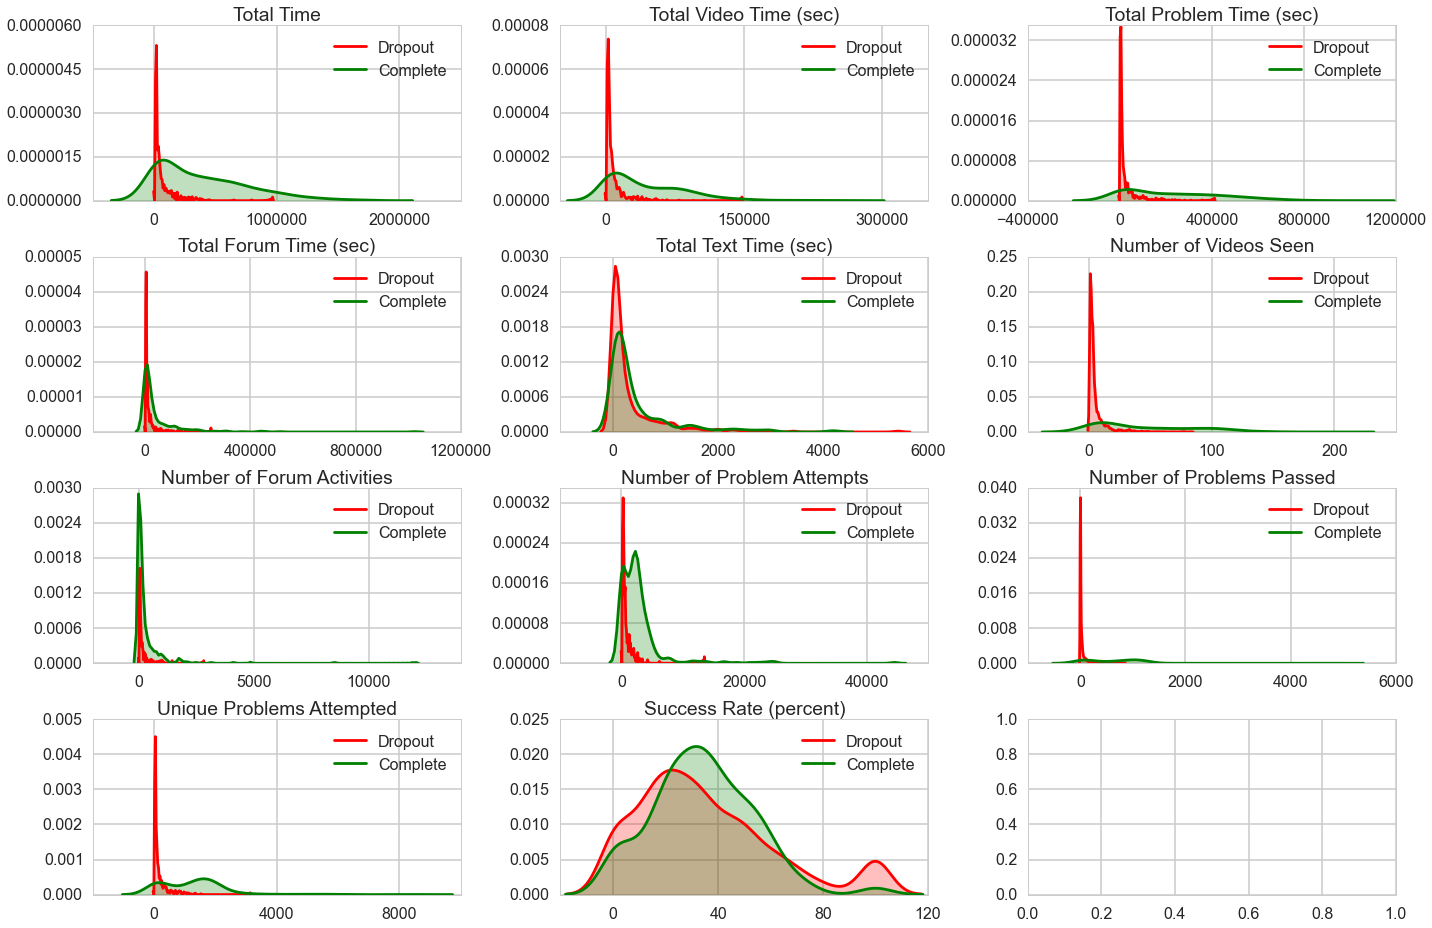

In [42]:
#KERNEL DENSITY PLOTS
df_kde_complete = df_kde[df_kde.dropout==0]
df_kde_dropout = df_kde[df_kde.dropout==1]

fig, axes = plt.subplots(nrows=4, ncols=3, tight_layout=True, figsize=(20, 13))

for ax, col in zip(axes.ravel(), COL_LIST):
    sns.kdeplot(df_kde_dropout[col], ax=ax, label="Dropout", shade=True, color='r')
    sns.kdeplot(df_kde_complete[col],ax=ax, label="Complete", shade=True, color='g')
    ax.set_title(map_title[col])
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

In choosing to plot kernel density plots we were not aiming to promising separators, instead we wanted to look at continuous smoothed distributions of various activities for two categories of users: those who completed the course and those whom we considered dropouts. We see that for every possible activity, dropouts have a more narrow and tall distribution and students who completed the course have more of spread out, wider distribution. This implies that students who completed the course stay continuously active throughout the course, but students who dropped out, have spikes of activity. We could see that the timeline of such spikes occurs in the beginning of the course. 

This general trend is different for forum activities and wiki/text reading. For these activities, both completed students and dropouts spent a lot more time in the beginning of the course than in the end. Interestingly, for the toal forum time spent on forum, dropouts seemed to outperform those who completed the course.

## 2.4 Weekly Activity per User 

Here we would like to aggregate daily student activities into weekly activities to see if there would be a more definitive trends between dropouts and those who completed the course.

In [43]:
df_usertask_cp = df_usertask.copy(deep=True)
df_usertask_cp[df_usertask_cp.columns] = df_usertask_cp[df_usertask_cp.columns].replace(np.NaN, 0)
df_weekly = df_usertask_cp.groupby(['username', 'user_id', 'course_week', 'dropout']).sum()
df_weekly['pass_rate'] = 100.0 * df_weekly.nproblems_correct / df_weekly.nproblem_attempts
df_weekly = df_weekly.reset_index()
# change type of 'course_week' from int to float
df_weekly['course_week'] = df_weekly['course_week'].astype(float)
ADJUST_BY = 0.1
mask = df_weekly.dropout == 1
df_weekly.loc[mask, 'course_week'] = df_weekly['course_week'] + ADJUST_BY
df_weekly.loc[~mask, 'course_week'] = df_weekly['course_week'] - ADJUST_BY
# df_weekly.head()

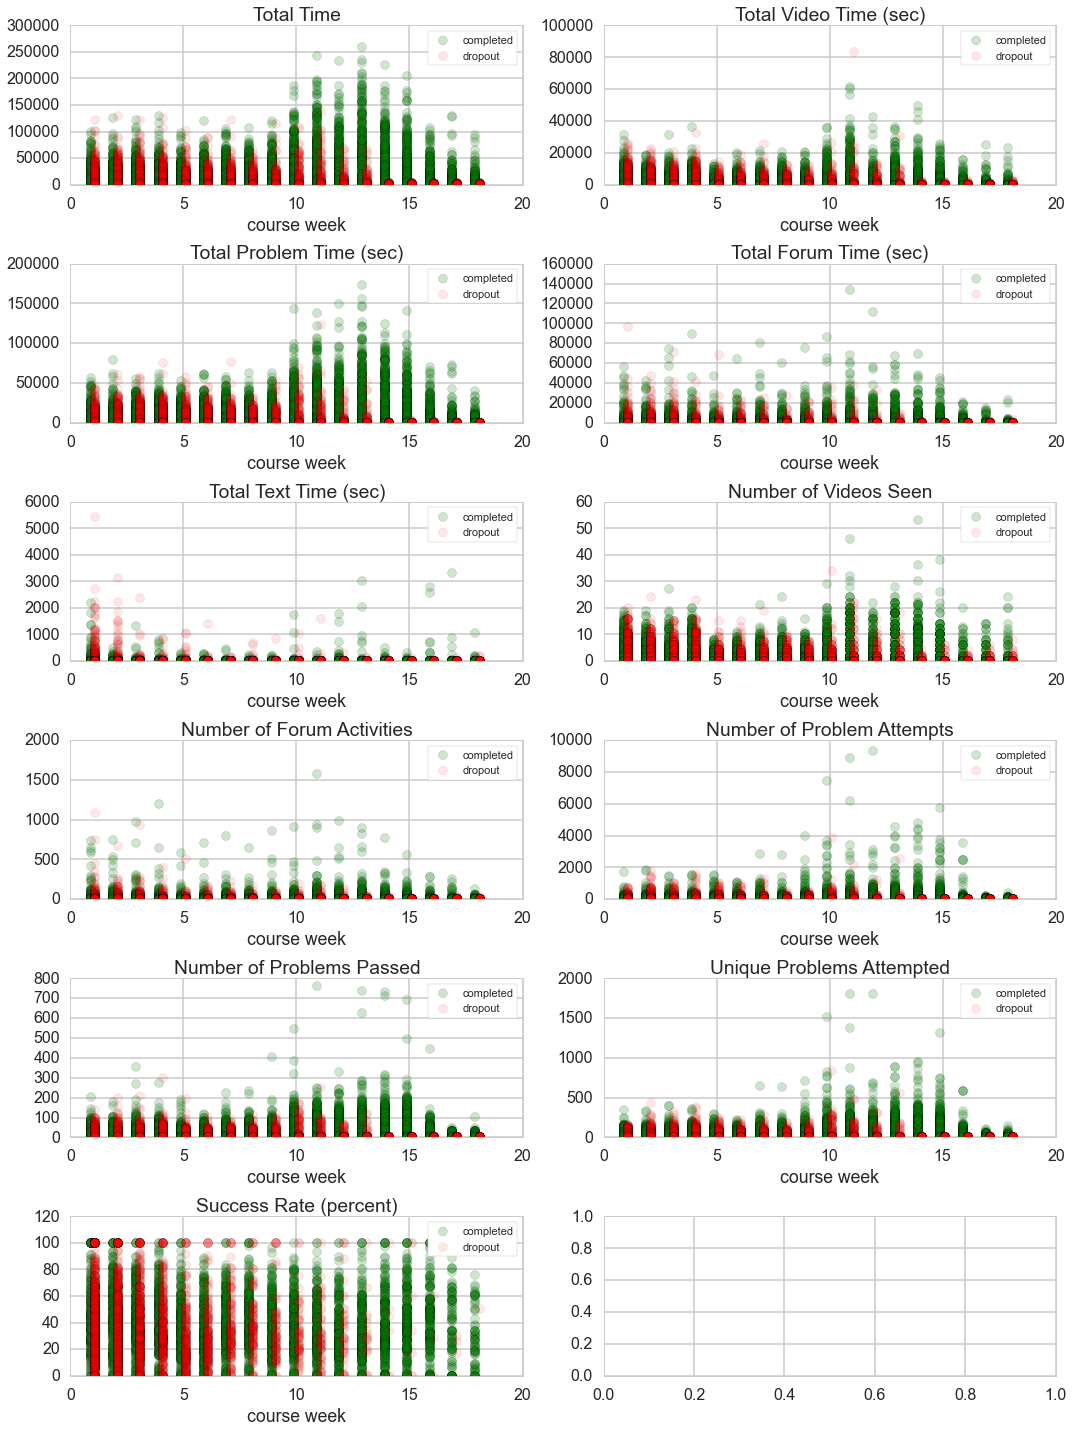

In [48]:
df_weekly_complete = df_weekly[df_weekly.dropout==0]
df_weekly_dropout = df_weekly[df_weekly.dropout==1]

fig, axes = plt.subplots(nrows=6, ncols=2, tight_layout=True, figsize=(15, 20))
#fig, axes = plt.subplots(nrows=11, ncols=1, tight_layout=True, figsize=(13, 55))
# fig.subplots_adjust(bottom=3, hspace=0.25, top = 6)

for ax, col in zip(axes.ravel(), COL_LIST):
    ax.scatter(df_weekly_complete.course_week, df_weekly_complete[col], c='green', alpha=0.2, label='completed', s=80)        
    ax.scatter(df_weekly_dropout.course_week, df_weekly_dropout[col], c='red', alpha=0.1, label='dropout', s=80)        
    ax.set_ylim(0,)
    ax.set_xlim(0, 20)
    ax.set_title(map_title[col])
    ax.set_xlabel('course week')
    ax.legend(frameon=True, loc='upper right', prop={'size':11})

These graphs show a decline in the total time commitment of even the most active dropouts starting from the midpoint of the course. However, a more striking feature is the increase in the time commitment of those who did not dropout. This increase also started halfway through the course (i.e. week 9). The increase in total time commitment from the non-dropouts seem to have been mainly due to an increase in the amount of time spent solving problems and participating in forum activities around that period as well. This is most likely due to increased difficulty of the course and students spending more time seeking help through the forums. Perhaps those that followed through past the midpoint of the course were either students who were competent enough to proceed without requiring help or those that were committed enough to seek help and increase their time commitment to the course. Increasing time commitment to solving problems could be due to various factors. Considering we did not have access to the course materials, we decided to further explore the student activity data to see whether there was an observable increase in the number of problems students were solving or whether they were simply having to make a higher number of attempts while solving problems. We investigated these by plotting the first two charts below. We then added a third chart to figure out the success rate of the students because we felt this could be an indication of a student's level of frustration. Students with lower success rate would likely be more frustrated than those with higher success rate.

## 2.5 Daily Aggregate Activities

Here we are showing aggregate activities per day. For aggregate activities we are only focusing on the number of times people watched videos, contributed to forums and answered problems. We are not looking in the total time spent on these activities.

In [11]:
df_daily = df_usertask.copy(deep=True)

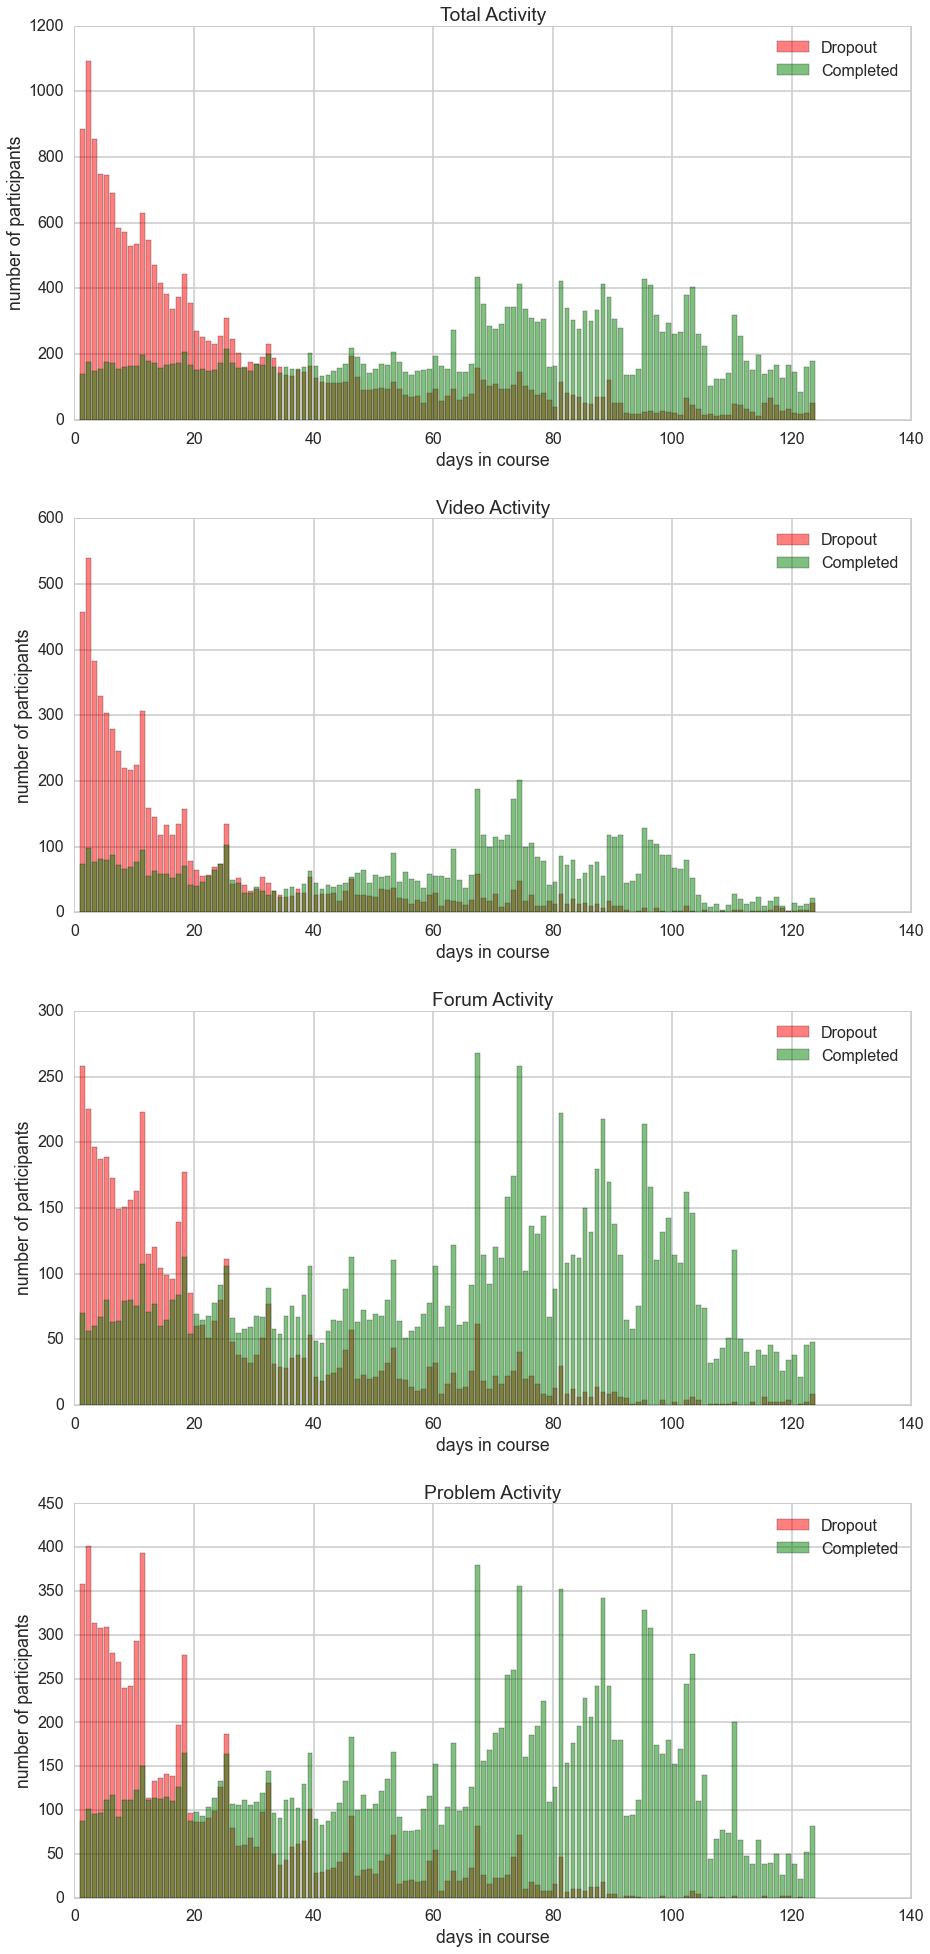

In [12]:
COL_LIST2=['total_time_30','nvideo','nforum_activity','nproblems']
TITLES2 = ['Total Activity','Video Activity', 'Forum Activity', 'Problem Activity']
map_title2 = dict(zip(COL_LIST2, TITLES2))

charts2 = len(COL_LIST2)
fig, ax = plt.subplots(figsize=(15,20), nrows=charts2, ncols=1)
fig.subplots_adjust(bottom=2, hspace=0.25, top = 3.3)

for i in range(charts2):
    col=COL_LIST2[i]
    # removes NaN from col
    df_daily_clean = df_daily[df_daily[col].notnull()]
    # counts the number of occurences of 'course_day' per dropout category
    df_daily_clean = df_daily_clean.groupby(['course_day', 'dropout']).count()
    df_daily_clean = df_daily_clean.reset_index()
    df_daily_clean_complete = df_daily_clean[df_daily_clean.dropout==0]
    df_daily_clean_dropout = df_daily_clean[df_daily_clean.dropout==1]
    
    
    ax[i].bar(df_daily_clean_dropout.course_day, df_daily_clean_dropout[col], color='red', alpha = 0.5, label='Dropout')
    ax[i].bar(df_daily_clean_complete.course_day, df_daily_clean_complete[col], color='green', alpha = 0.5, label='Completed')
    ax[i].legend(loc='upper right')
    ax[i].set_ylabel('number of participants')
    ax[i].set_xlabel('days in course')
    ax[i].set_title(map_title2[col])

For all 3 types of activities we see that dropouts' activities die off within the first one month. From the first graph, it is evident that there was a significant decline in the number of daily participants throughout the course. Most of the decline resulted from inactivity by users who eventually dropped out of the course. One striking observation from these graphs is that in the second half of the course, amongst the students that completed the course, there was actually an increase in the number of participants that engaged in forum activities and solved problems. We suspected that this might be an indication that the course got harder halfway through. In order to analyze this trend in deeper detail, we then created the following plots to show the total time that each student spent on each of these core activities on a weekly basis. We chose to plot these graphs on a weekly basis (instead of daily interactions) because the course operated on a weekly schedule (i.e. students who engage with the course on a particular day may not have any need to return until new content is uploaded the following week).

## 2.6 Pair Plots

In [13]:
df_pair = df_usertask.copy(deep=True)
df_pair = df_pair.groupby(['user_id', 'dropout']).sum()
df_pair = df_pair.dropna()
df_pair = df_pair.reset_index()

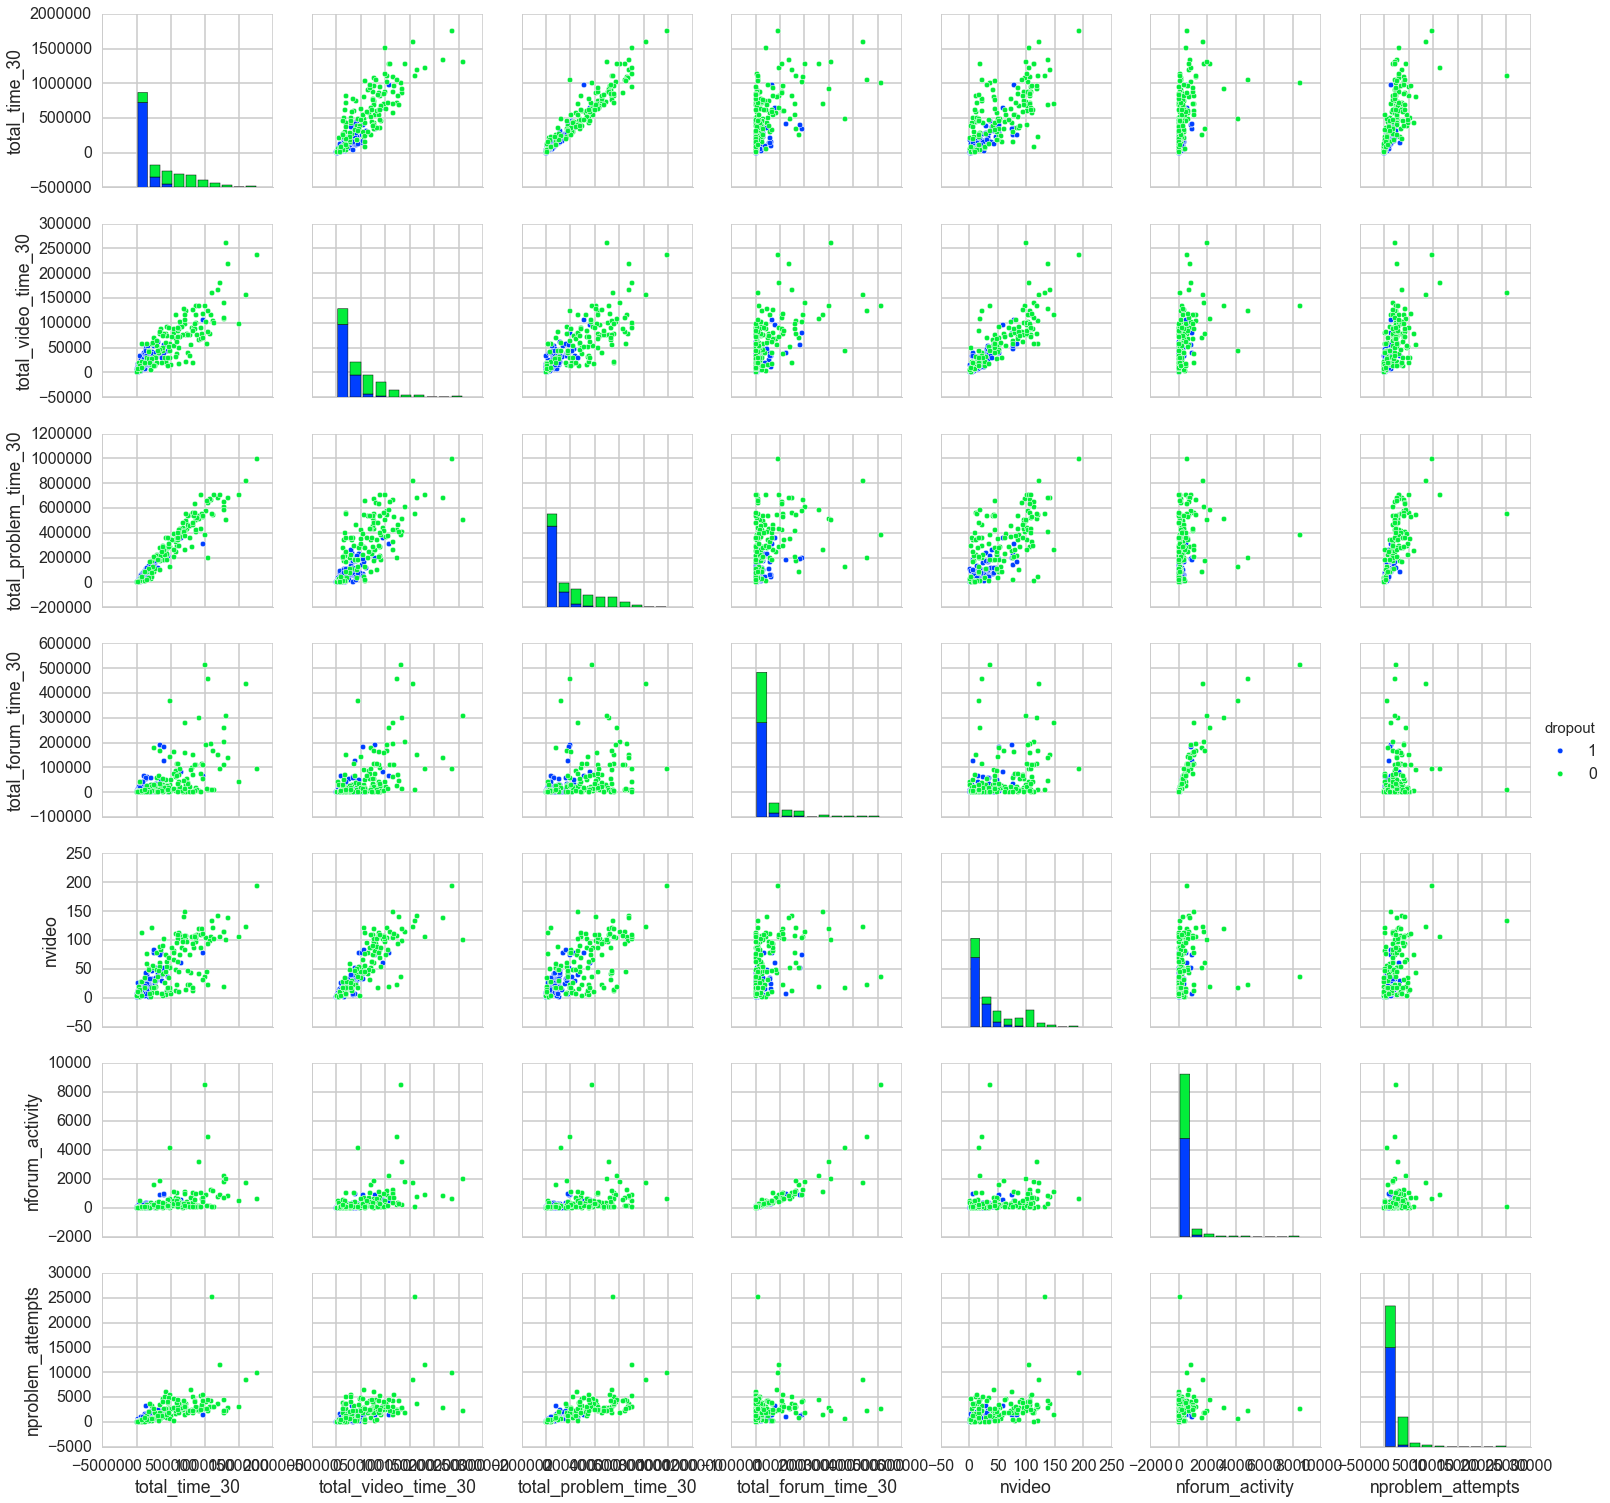

In [14]:
COL_LIST3=['total_time_30','total_video_time_30','total_problem_time_30','total_forum_time_30','nvideo','nforum_activity','nproblem_attempts']

sns.set_style("whitegrid")
sns.pairplot(df_pair, 
             vars=COL_LIST3,
             hue="dropout",
             size=3,
             plot_kws=dict(s=30),
             palette="bright")

Based off these pair plots, we don't see features that could best separate dropouts and non-dropouts.

## 2.7 Inactive Users

We realized that users do not come from a binary category of dropouts vs non-dropouts. There's another dimensions - students who just signed up in the beginning and were not active throughout entire course. These users exhibit characteristics of 'dropouts' as well as 'non-dropouts' based on our current definition, therefore in reality they need to be in their own separate category of **inactive users**. We would like to filter out these users from our modeling so that they do not add noise to the data.

We define inactive users as those who exhibit disproportionately high activity in the first week of the course. Based on the histogram below, we choose a first-week activity threshold of 90% above which all users are characterized as **inactive**.

In [15]:
# Sum of the total time users spent by week
df_timeByWeek = df_usertask.groupby(['course_week', 'user_id', 'dropout']).sum()
df_timeByWeek = df_timeByWeek[['total_time_30']]
print df_timeByWeek.shape
# df_timeByWeek.head()

(15489, 1)


In [16]:
# Sum of the time users spent in the first week
df_timeFirstWeek = df_timeByWeek.reset_index()
df_timeFirstWeek = df_timeFirstWeek[df_timeFirstWeek.course_week == 1]
df_timeFirstWeek.rename(columns={'total_time_30': 'total_time_firstWeek'}, inplace=True)
df_timeFirstWeek.drop('course_week', axis=1, inplace=True)
df_timeFirstWeek = df_timeFirstWeek.set_index(['user_id','dropout'])
print df_timeFirstWeek.shape
# df_timeFirstWeek.head()

(3360, 1)


In [17]:
# Sum of the time users spent in ALL weeks (week 1 - 18)
df_timeAllWeeks = df_timeByWeek.reset_index()
#df_timeAllWeeks = df_timeAllWeeks[df_timeAllWeeks.course_week != 1]
df_timeAllWeeks = df_timeAllWeeks.groupby(['user_id', 'dropout']).sum()
df_timeAllWeeks.rename(columns={'total_time_30': 'total_time_AllWeeks'}, inplace=True)
df_timeAllWeeks.drop('course_week', axis=1, inplace=True)
print df_timeAllWeeks.shape
# df_timeAllWeeks.head()

(4956, 1)


In [18]:
#Create a new dataframe 'df_InactiveUsers'
df_InactiveUsers = df_timeFirstWeek.copy()
print df_InactiveUsers.shape

# This dataframe should have user_id and dropout as 'keys' and two columns representing 'total time spent in 1st week'
# and the 'total time spent in ALL the weeks'
df_InactiveUsers['total_time_AllWeeks'] = df_timeAllWeeks.total_time_AllWeeks
print df_InactiveUsers.shape
df_InactiveUsers = df_InactiveUsers.fillna(0)

# Add column 'Frac' which shows the fraction of time spent in first week as a function of ALL the weeks
df_InactiveUsers['frac'] = df_InactiveUsers['total_time_firstWeek']/df_InactiveUsers['total_time_AllWeeks']
print df_InactiveUsers.shape

df_InactiveUsers.reset_index(inplace=True)
# df_InactiveUsers.head()

(3360, 1)
(3360, 2)
(3360, 3)


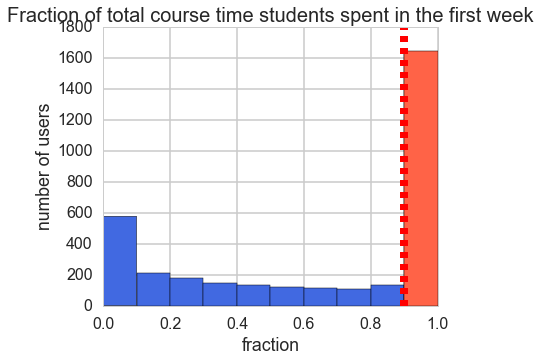

In [19]:
hist_active = df_InactiveUsers[df_InactiveUsers.frac <0.9]
hist_inactive = df_InactiveUsers[df_InactiveUsers.frac >= 0.9]
plt.figure(figsize=(6,5))
plt.hist(df_InactiveUsers.frac, color='royalblue')
plt.bar(0.9, 1640, width=0.1, color='tomato')
plt.ylabel('number of users')
plt.xlabel('fraction')
plt.title('Fraction of total course time students spent in the first week', fontsize=20)
plt.axvline(x=0.9, ymin=0, ymax=1, color='r', ls='--', lw=8)

In [20]:
df_frac_inactive = df_InactiveUsers[df_InactiveUsers.frac >= 0.9]
df_frac_active = df_InactiveUsers[df_InactiveUsers.frac < 0.9]
df_inactiveUser_final = pd.DataFrame(df_frac_inactive.user_id)
df_activeUser_final = pd.DataFrame(df_frac_active.user_id)
df_inactiveUser_final.to_csv('./data/inactiveUserID.csv')
df_activeUser_final.to_csv('./data/activeUserID.csv')